<a href="https://colab.research.google.com/github/jacedoe/pythoniso/blob/main/estudio_mercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplos de estudio de mercados y valores con Python

Antes que nada, instalamos la librería de Yahoo Finance para obtener los datos que utilizaremos para nuestros análisis de valores

In [2]:
!pip install yfinance


     |████████████████████████████████| 6.3 MB 6.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=5314ccf9f101f76d9180f2db13e0100ad15fe1ddb182946c1bbbe8338b398b7a
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


Continuamos con la importación de las liberias necesarias, numpy, pandas, matplotlib, yfinance y plotly.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf  
import plotly.graph_objs as go


In [ ]:
datos = pd.read_csv('/content/ELE.MC.csv')
datos.head()

In [ ]:
type(datos)

pandas.core.frame.DataFrame

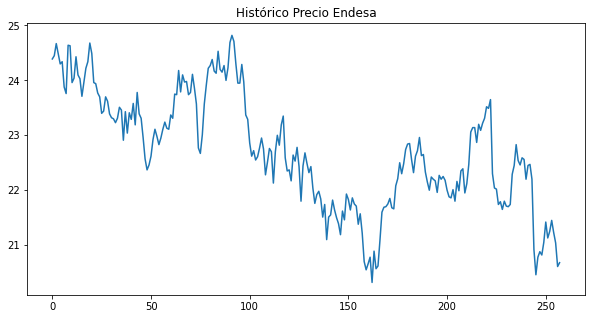

In [ ]:
# Creación de los gráficos
plt.figure(figsize=(10, 5))
plt.title('Histórico Precio Endesa')
plt.plot(datos['Close'])
plt.show()

[*********************100%***********************]  1 of 1 completed


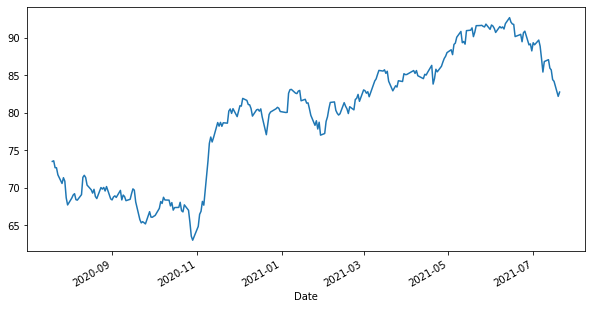

In [6]:
import yfinance as yf  
import plotly.graph_objs as go
plt.figure(figsize=(10, 5))
# Get the data for the SPY ETF by specifying the stock ticker, start date, and end date
data = yf.download('LYXIB.MC',period='1y', interval='1d')
# Plot the close prices
data["Adj Close"].plot()
plt.show()

In [8]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-14,85.779999,86.000000,85.459999,85.690002,85.690002,6585
2021-07-15,84.910004,85.110001,84.250000,84.400002,84.400002,33852
2021-07-16,84.720001,85.080002,83.470001,84.180000,84.180000,26564
2021-07-19,83.379997,83.379997,81.699997,82.169998,82.169998,111365
2021-07-20,82.480003,82.870003,81.889999,82.739998,82.739998,36959


In [7]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-20,72.980003,73.550003,72.650002,73.500000,73.500000,5801
2020-07-21,74.269997,75.279999,73.580002,73.580002,73.580002,36390
2020-07-22,73.419998,73.570000,72.500000,72.660004,72.660004,27119
2020-07-23,72.800003,73.040001,72.370003,72.660004,72.660004,45586
2020-07-24,71.699997,71.940002,71.300003,71.720001,71.720001,8475


In [ ]:
!pip freeze

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86 entries, 2021-07-12 09:00:00+02:00 to 2021-07-16 17:00:00+02:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       86 non-null     float64
 1   High       86 non-null     float64
 2   Low        86 non-null     float64
 3   Close      86 non-null     float64
 4   Adj Close  86 non-null     float64
 5   Volume     86 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 4.7 KB


In [9]:
data['Volume'].mean()

19037.51550387597

In [10]:
data['Volume'].median()

9473.0

In [ ]:
#Interval required 1 minute
data = yf.download(tickers='LYXIB.MC', period='10y', interval='1mo')

#declare figure
fig = go.Figure()

#Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], name = 'market data'))

# Add titles
fig.update_layout(
    title='Price evolution',
    yaxis_title='Stock Price (EUR per Shares)')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15m", step="minute", stepmode="backward"),
            dict(count=45, label="45m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(count=3, label="3h", step="hour", stepmode="backward"),
            dict(step="all")
        ])
    )
)

#Show
fig.show()

[*********************100%***********************]  1 of 1 completed
